In [1]:
!pip install pandas numpy seaborn matplotlib tensorflow keras sklearn &> /dev/null

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import Xception

import time
start_time = time.time()

In [3]:
PATH_DATA_TRAIN = '../input/cars-data-ttv-80-10-10/data-preprocessed/data-preprocessed/train'
PATH_DATA_TEST = '../input/cars-data-ttv-80-10-10/data-preprocessed/data-preprocessed/test'
PATH_DATA_VALIDATION = '../input/cars-data-ttv-80-10-10/data-preprocessed/data-preprocessed/validation'
PATH_SAVED_MODEL = 'xception.h5'

# Load Dataset As Generators

In [4]:
generator = ImageDataGenerator(rescale = 1./255.)

target_size = (100, 100)
batch_size = 32

train_batches = generator.flow_from_directory(
    PATH_DATA_TRAIN, class_mode='categorical', 
    batch_size=batch_size, target_size=target_size
)

validation_batches = generator.flow_from_directory(
    PATH_DATA_VALIDATION, class_mode='categorical',  
    batch_size=batch_size, target_size=target_size
)

test_batches = generator.flow_from_directory(
    PATH_DATA_TEST, class_mode='categorical', shuffle=False, 
    batch_size=batch_size, target_size=target_size
)

Found 12959 images belonging to 7 classes.
Found 1616 images belonging to 7 classes.
Found 1610 images belonging to 7 classes.


In [5]:
# preview data (batch size, width, height, colors)
print('x_train shape:', train_batches[0][0].shape)
print('x_validation shape:', validation_batches[0][0].shape)
print('x_test shape:', test_batches[0][0].shape)
print('y_train shape:', train_batches[0][1].shape)
print('y_validation shape:', validation_batches[0][1].shape)
print('y_test shape:', test_batches[0][1].shape)

x_train shape: (32, 100, 100, 3)
x_validation shape: (32, 100, 100, 3)
x_test shape: (32, 100, 100, 3)
y_train shape: (32, 7)
y_validation shape: (32, 7)
y_test shape: (32, 7)


In [6]:
# input & output shape
input_shape = train_batches[0][0][0].shape
output_shape = len(train_batches[0][1][0])

# display input & output shape
print('Input Shape:', input_shape)
print('Output Shape:', output_shape)

Input Shape: (100, 100, 3)
Output Shape: 7


# Build & Compile Model

In [7]:
model = Xception(
    input_shape=input_shape,
    classes=output_shape,
    weights=None,
    classifier_activation='softmax'
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2022-11-10 17:53:44.419640: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 17:53:44.420867: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 17:53:44.582419: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 17:53:44.583467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 17:53:44.584275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 49, 49, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 49, 49, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

# Train Model

In [9]:
# train model
r = model.fit(train_batches, validation_data=validation_batches, epochs=100)

# save model
model.save(PATH_SAVED_MODEL)

# load model
# model = load_model(PATH_SAVED_MODEL)

2022-11-10 17:53:49.733169: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-11-10 17:53:56.186058: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


405/405 [==============================] - 183s 415ms/step - loss: 1.5958 - accuracy: 0.3825 - val_loss: 1.9006 - val_accuracy: 0.2543
Epoch 2/100
405/405 [==============================] - 108s 268ms/step - loss: 1.2378 - accuracy: 0.5327 - val_loss: 2.4422 - val_accuracy: 0.3899
Epoch 3/100
405/405 [==============================] - 107s 265ms/step - loss: 0.9891 - accuracy: 0.6267 - val_loss: 15.1707 - val_accuracy: 0.2339
Epoch 4/100
405/405 [==============================] - 107s 265ms/step - loss: 0.8386 - accuracy: 0.6862 - val_loss: 2.0077 - val_accuracy: 0.4814
Epoch 5/100
405/405 [==============================] - 108s 266ms/step - loss: 0.7237 - accuracy: 0.7254 - val_loss: 1.4875 - val_accuracy: 0.5303
Epoch 6/100
405/405 [==============================] - 107s 264ms/step - loss: 0.6122 - accuracy: 0.7740 - val_loss: 1.3656 - val_accuracy: 0.6250
Epoch 7/100
405/405 [==============================] - 107s 265ms/step - loss: 0.5081 - accuracy: 0.8117 - val_loss: 0.9168 - val

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Evaluate Model's Training & Validation Results

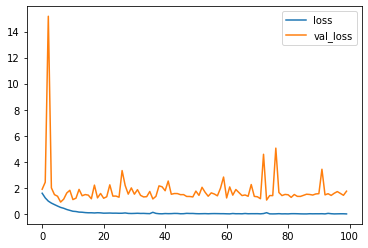

In [10]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

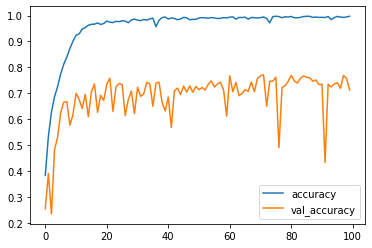

In [11]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Generate Predictions With Model

In [12]:
y_pred = model.predict(test_batches).argmax(axis=1)

In [13]:
model.evaluate(test_batches)

51/51 [==============================] - 12s 227ms/step - loss: 1.6970 - accuracy: 0.7348


[1.6969996690750122, 0.7347826361656189]

# Evaluate Model's Prediction Results

In [14]:
# generate classification report
class_labels = list(test_batches.class_indices.keys())
report = classification_report(test_batches.classes, y_pred, target_names=class_labels, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report

,precision,recall,f1-score,support
hatchback,0.671642,0.288462,0.403587,156.000000
mpv,0.750000,0.777778,0.763636,108.000000
sedan,0.773292,0.601449,0.676630,414.000000
sport,0.695341,0.858407,0.768317,452.000000
suv,0.764012,0.911972,0.831461,284.000000
truck,0.805556,0.906250,0.852941,160.000000
wagon,0.406250,0.361111,0.382353,36.000000
accuracy,0.734783,0.734783,0.734783,0.734783
macro avg,0.695156,0.672204,0.668418,1610.000000
weighted avg,0.733358,0.734783,0.720004,1610.000000


Text(0.5, 69.0, 'Predicted Values')

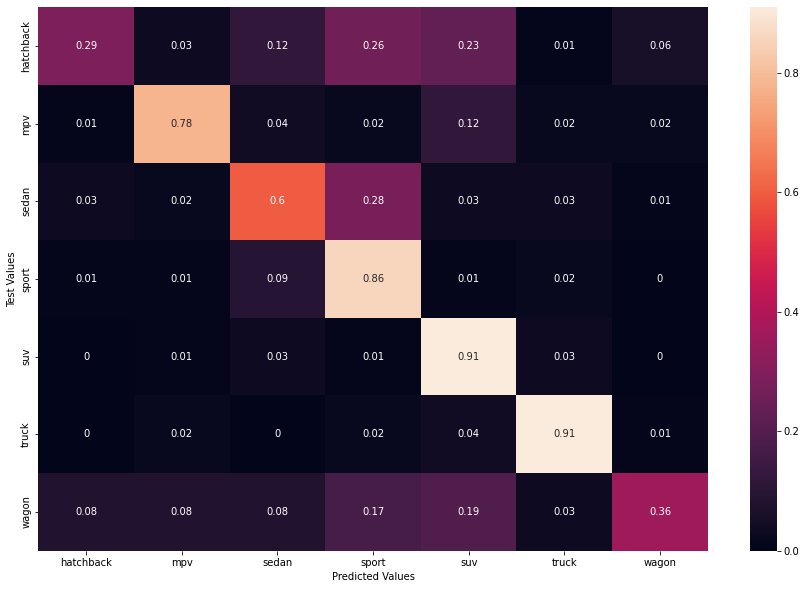

In [15]:
# compute confusion matrix
matrix = confusion_matrix(test_batches.classes, y_pred)

# normalize confusion matrix
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix = np.around(matrix, decimals=2)

# generate confusion matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Test Values')
plt.xlabel('Predicted Values')

# Compute Execution Time

In [1]:
execution_time_s = round(time.time() - start_time, 2)
execution_time_m = round(execution_time_s/60, 2)
execution_time_h = round(execution_time_m/60, 2)

print('Execution Time (Hours):', execution_time_h)
print('Execution Time (Minutes):', execution_time_m)
print('Execution Time (Seconds):', execution_time_s)

Execution Time (Hours): 3.25
Execution Time (Minutes): 195.22
Execution Time (Seconds): 11712.98

